In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
df=pd.read_csv('Temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# the data cotains float type data except for date column

In [203]:
print('the number of rows and columns are : ',df.shape)

the number of rows and columns are :  (7752, 25)


In [204]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [205]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# we can see there are nan values present in the data in almost every column as well as in target variable

# we can drop the nan values 

In [206]:
df=df.dropna(how='any')

In [207]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# now there are no nan values present in the data

# converting whole date into month only datapoint as month wise there is always change in temp.

In [208]:
df.Date.value_counts()

23-08-2016    25
24-07-2014    25
21-08-2014    25
15-07-2013    25
15-07-2017    25
              ..
24-07-2015    22
23-08-2017    22
06-07-2017    22
13-08-2015    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

In [209]:
df['Date']

0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7745    30-08-2017
7746    30-08-2017
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
Name: Date, Length: 7588, dtype: object

In [210]:
df["Month"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.month

In [211]:
df=df.drop(['Date'],axis=1)

# dropping column date as we have already converted it into date

In [212]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6


In [213]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month                 int64
dtype: object

# EDA and Visualization

<AxesSubplot:xlabel='Month', ylabel='count'>

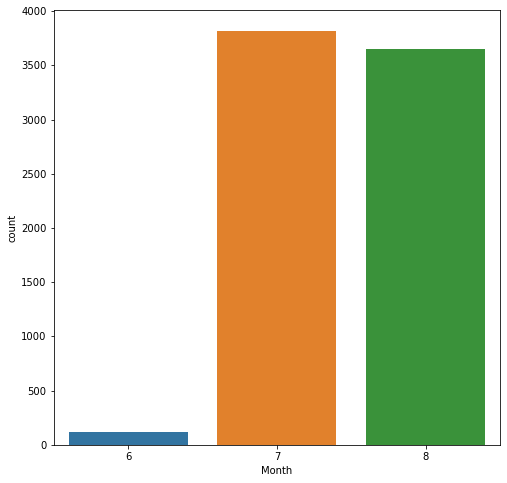

In [214]:
plt.subplots(figsize=(8,8))
sns.countplot(df['Month'])

# month 7 have the highest data count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0')])

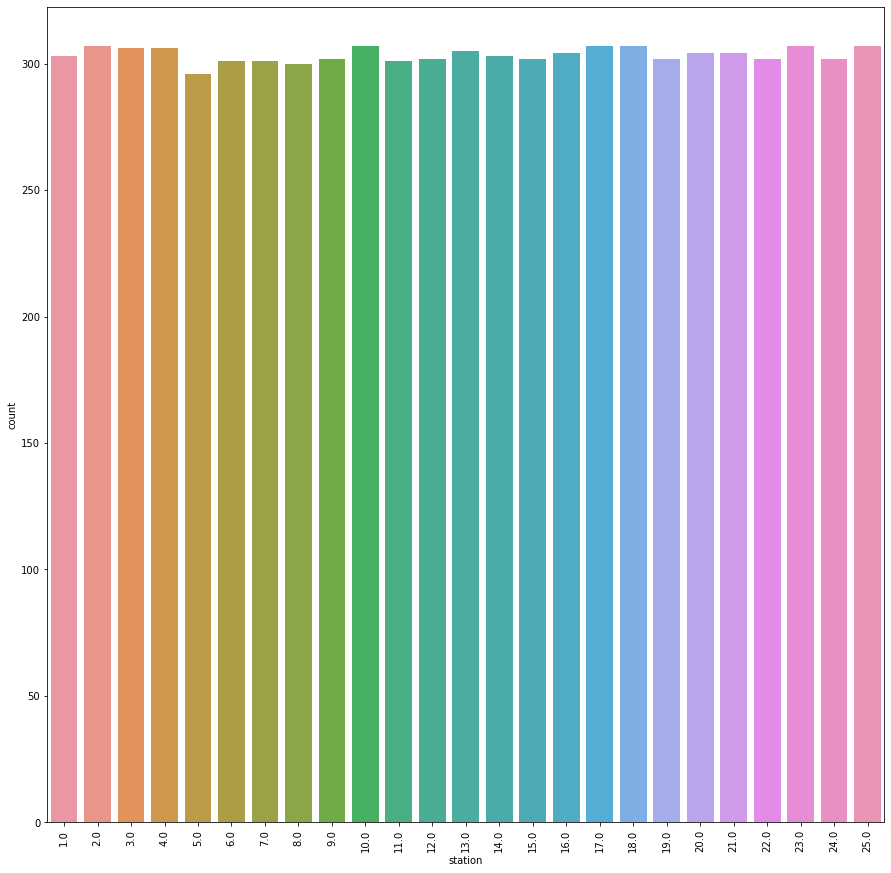

In [215]:
plt.subplots(figsize=(15,15))
sns.countplot(df['station'])
plt.xticks(rotation=90)

# almost all station count are similar 

# checking for skewness

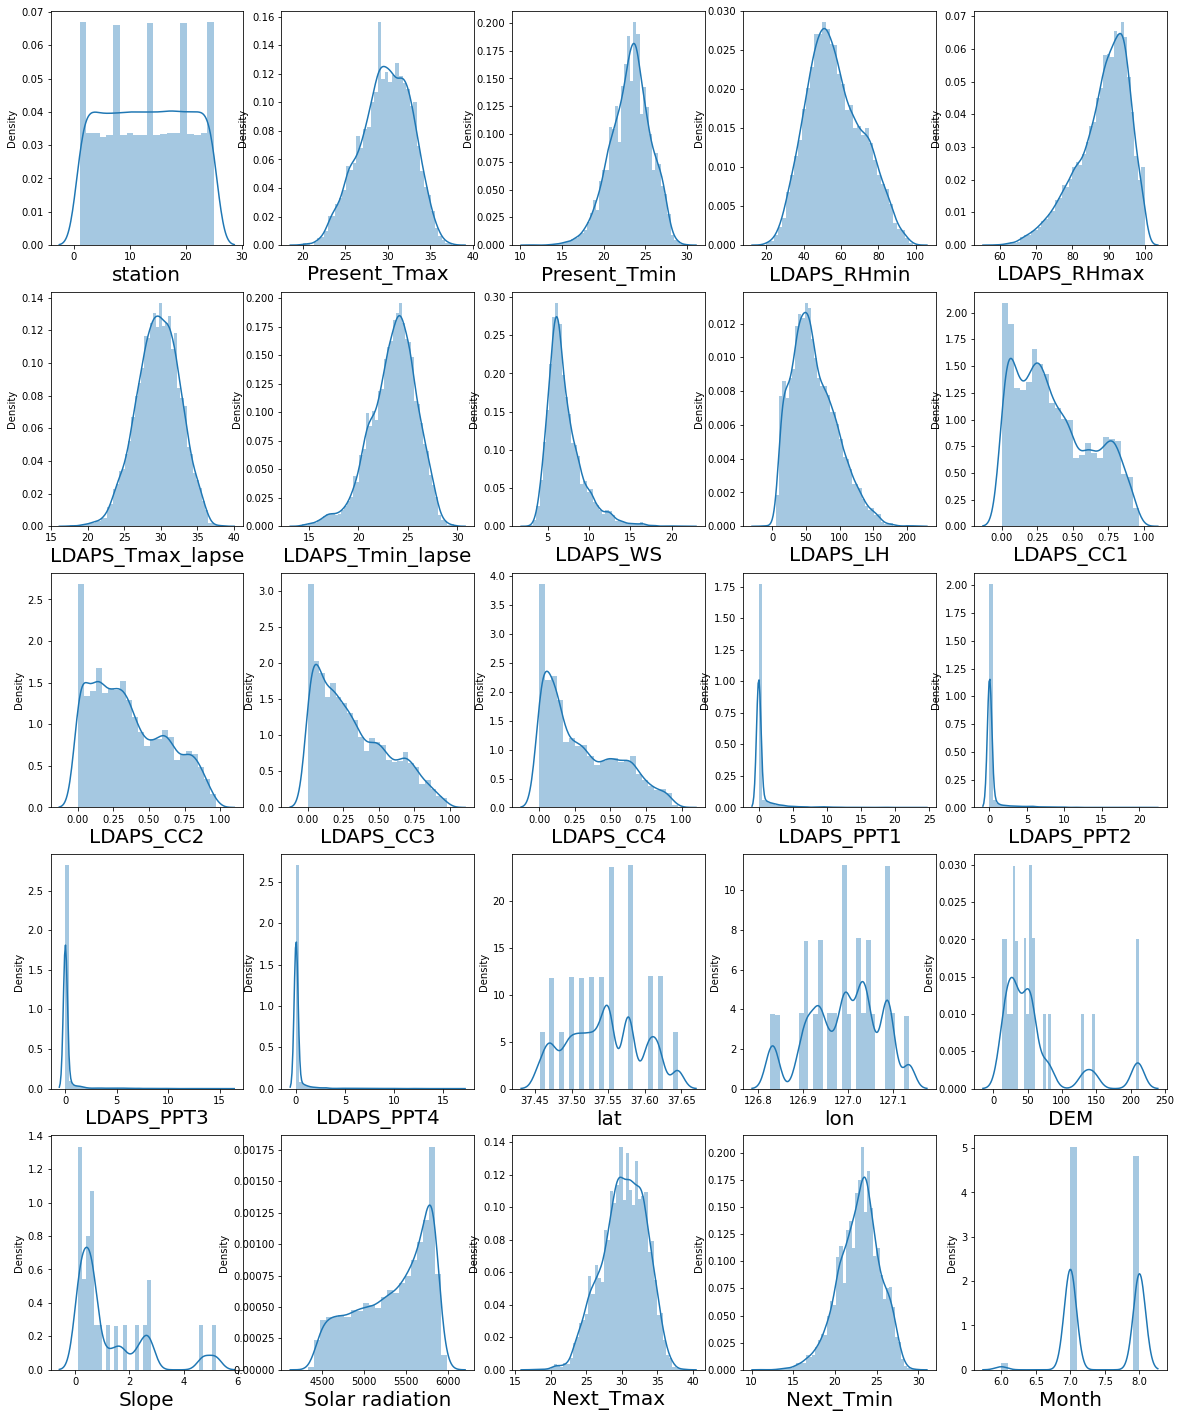

In [216]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if column!='Date':
        if plotnumber<=len(df.columns):
            ax=plt.subplot(5,5,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

# columns with bimodial distribution: Slope, Dem, Ion, Iat and station
# rest all are normal distribution with some biasing present

# check some graphs with refrence to Next_Tmax

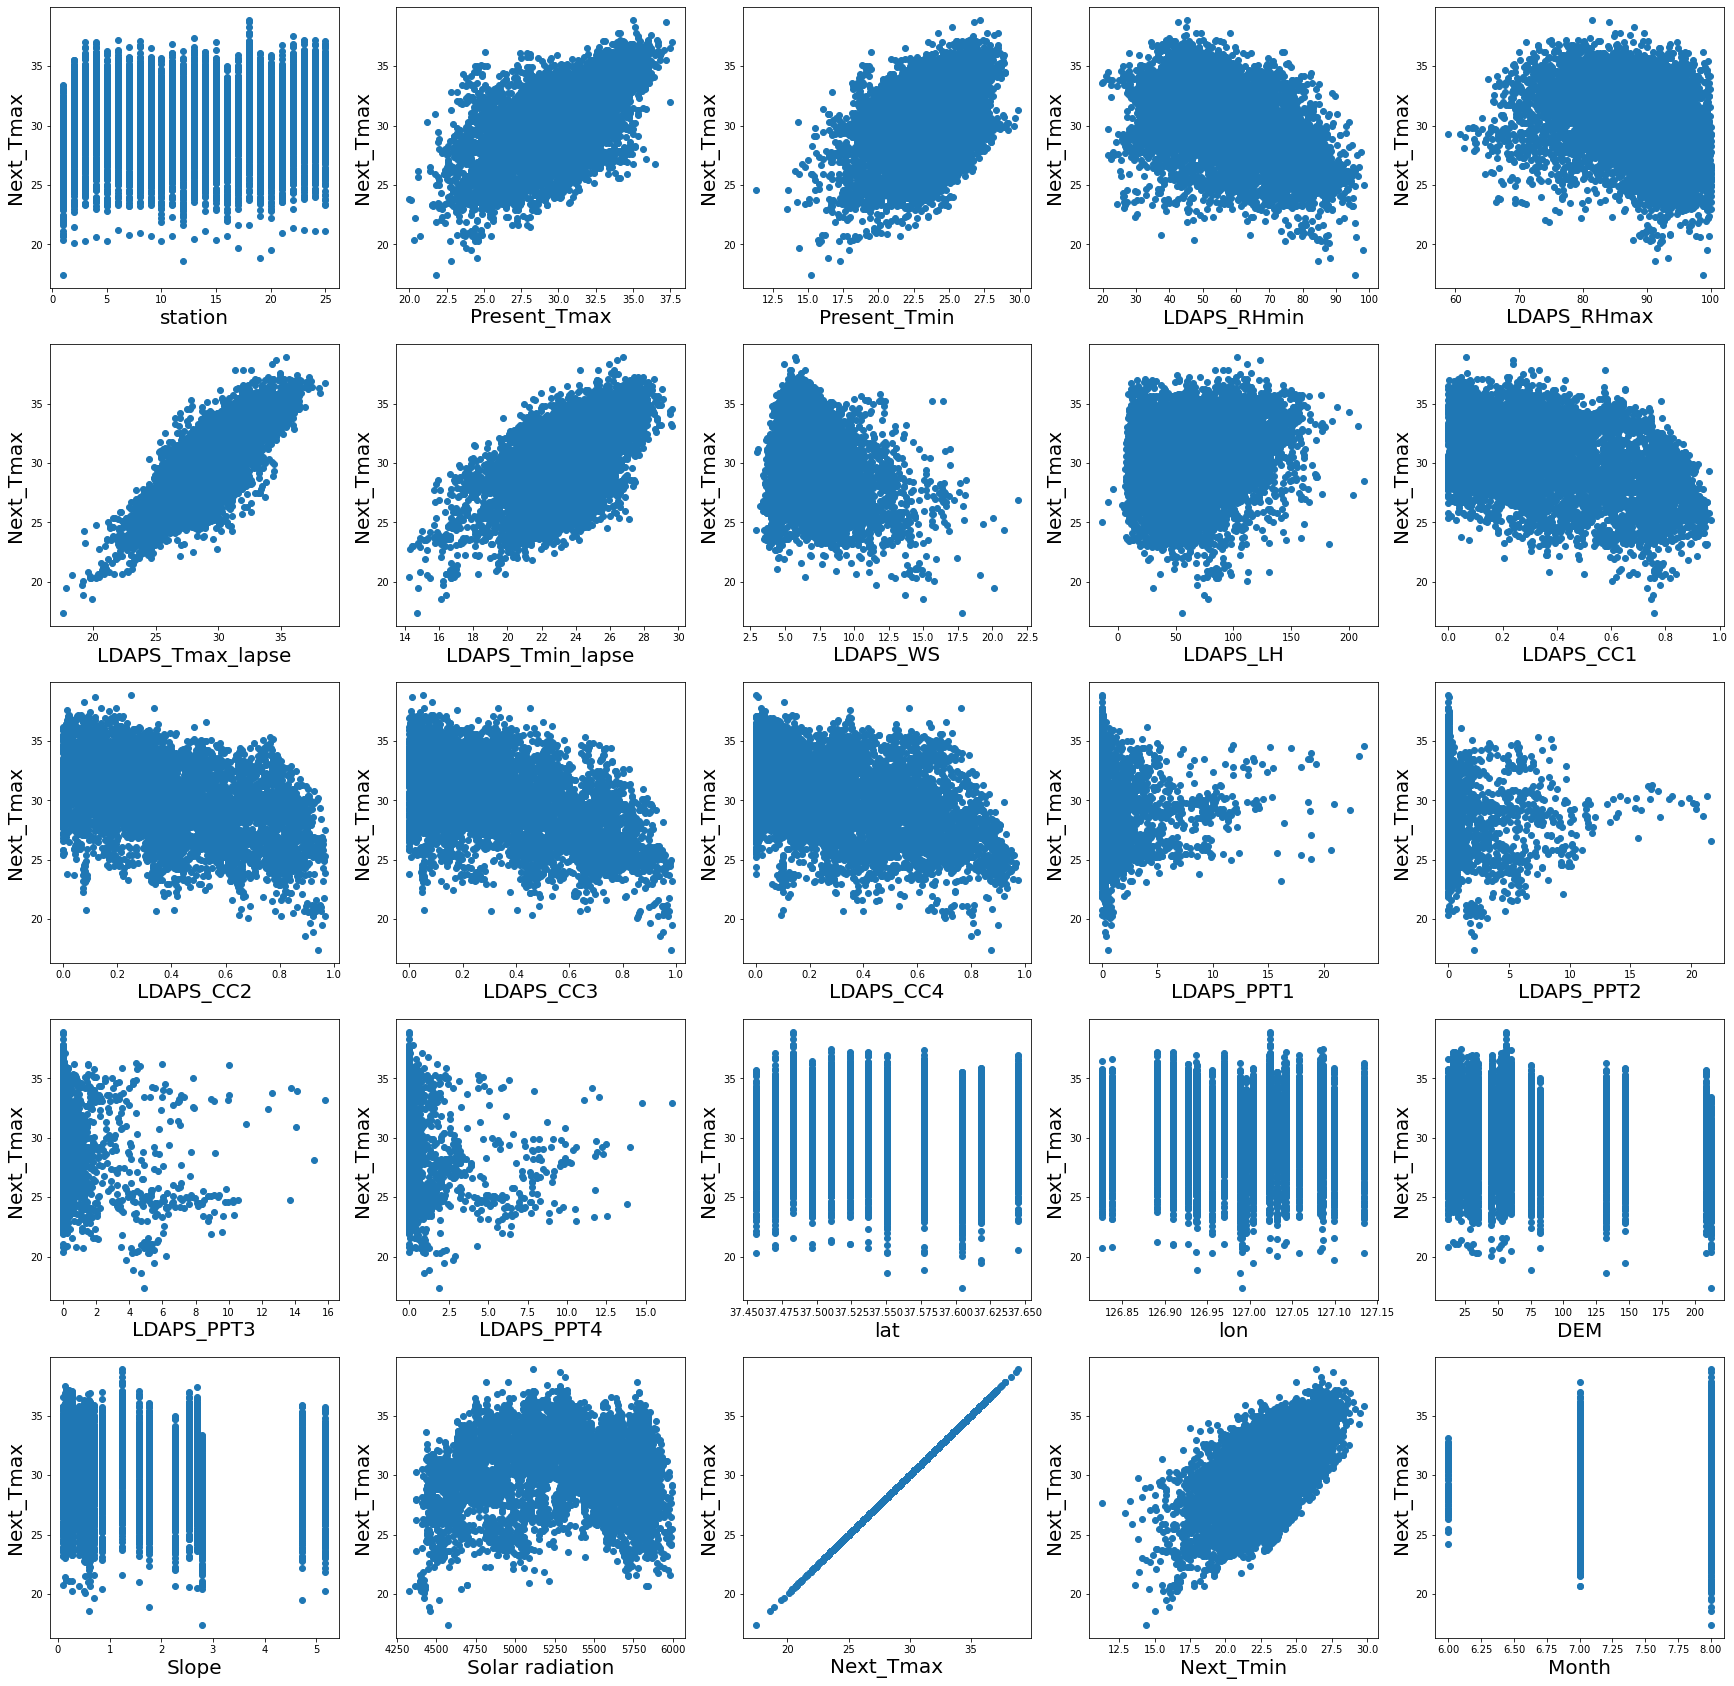

In [217]:
plt.figure(figsize=(30,30))
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['Next_Tmax'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmax',fontsize=20)
    plotnumber+=1
plt.show()

# we can see positive correlation in present tmax, present tmin, ldaps_tmin_lapse,ldaps_max_lap
 
# we can see negative correlation in LADPS_rhmin

# check some graphs with refrence to Next_Tmin

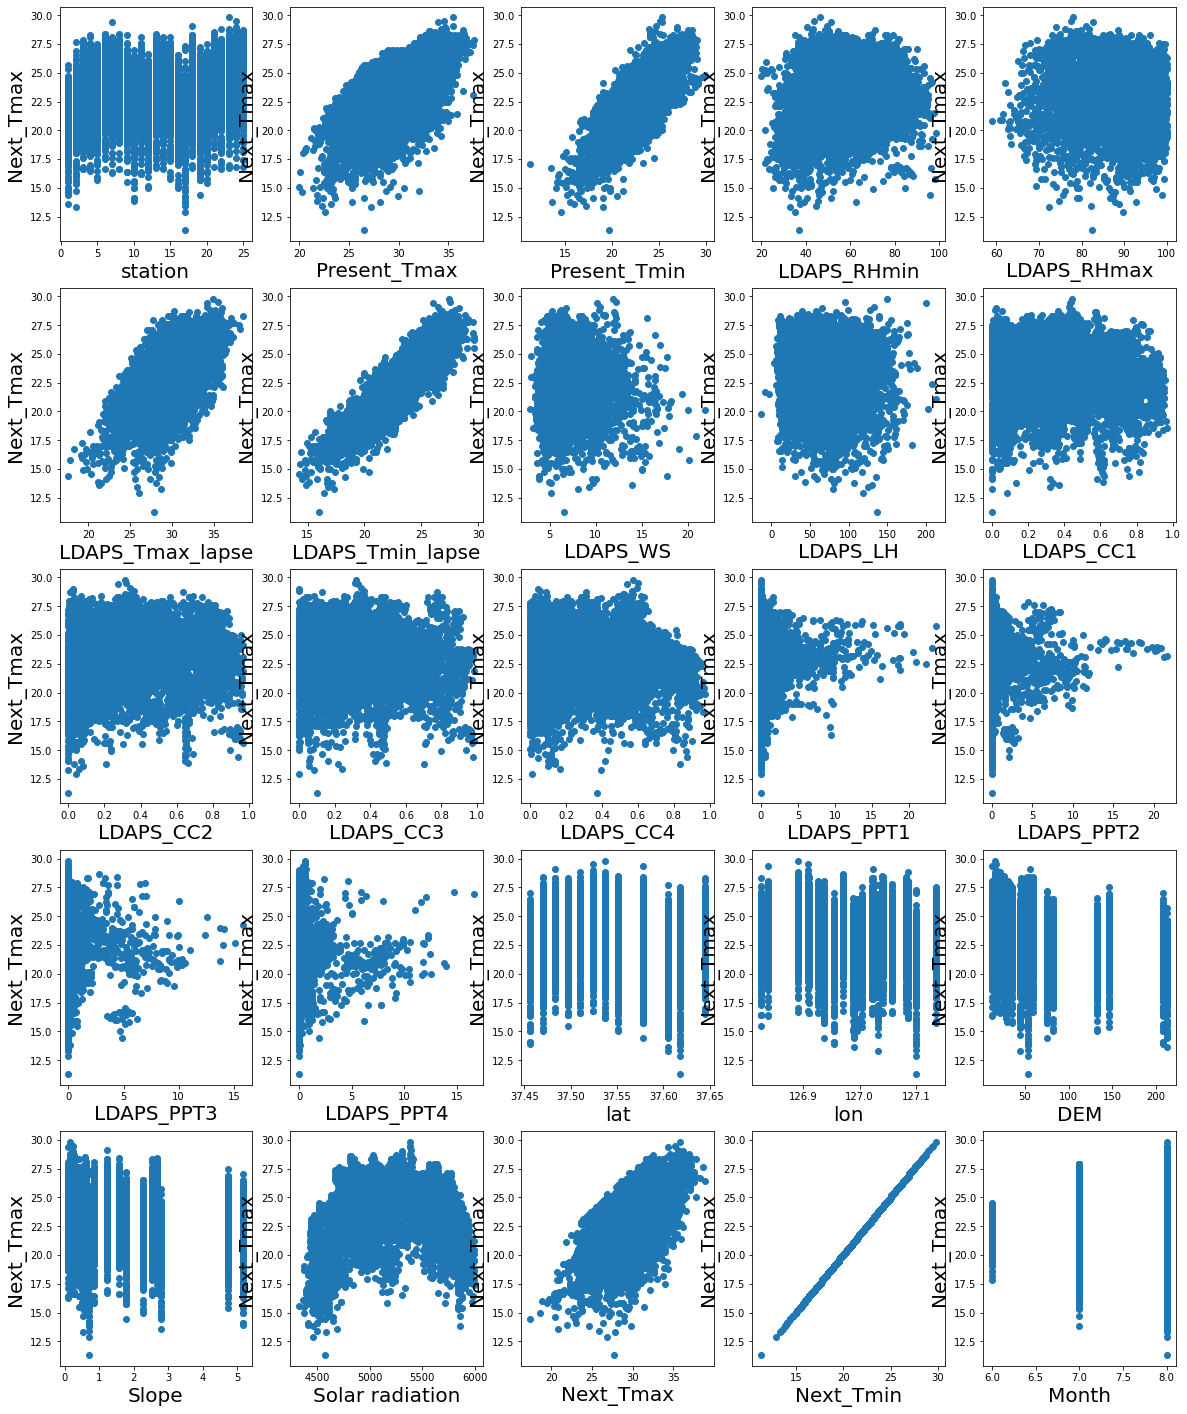

In [218]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['Next_Tmin'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmax',fontsize=20)
    plotnumber+=1
plt.show()

# we can see positive correlation in present tmax, present tmin, ldaps_tmin_lapse,ldaps_max_lap

# checking correlation with heatmap

<AxesSubplot:>

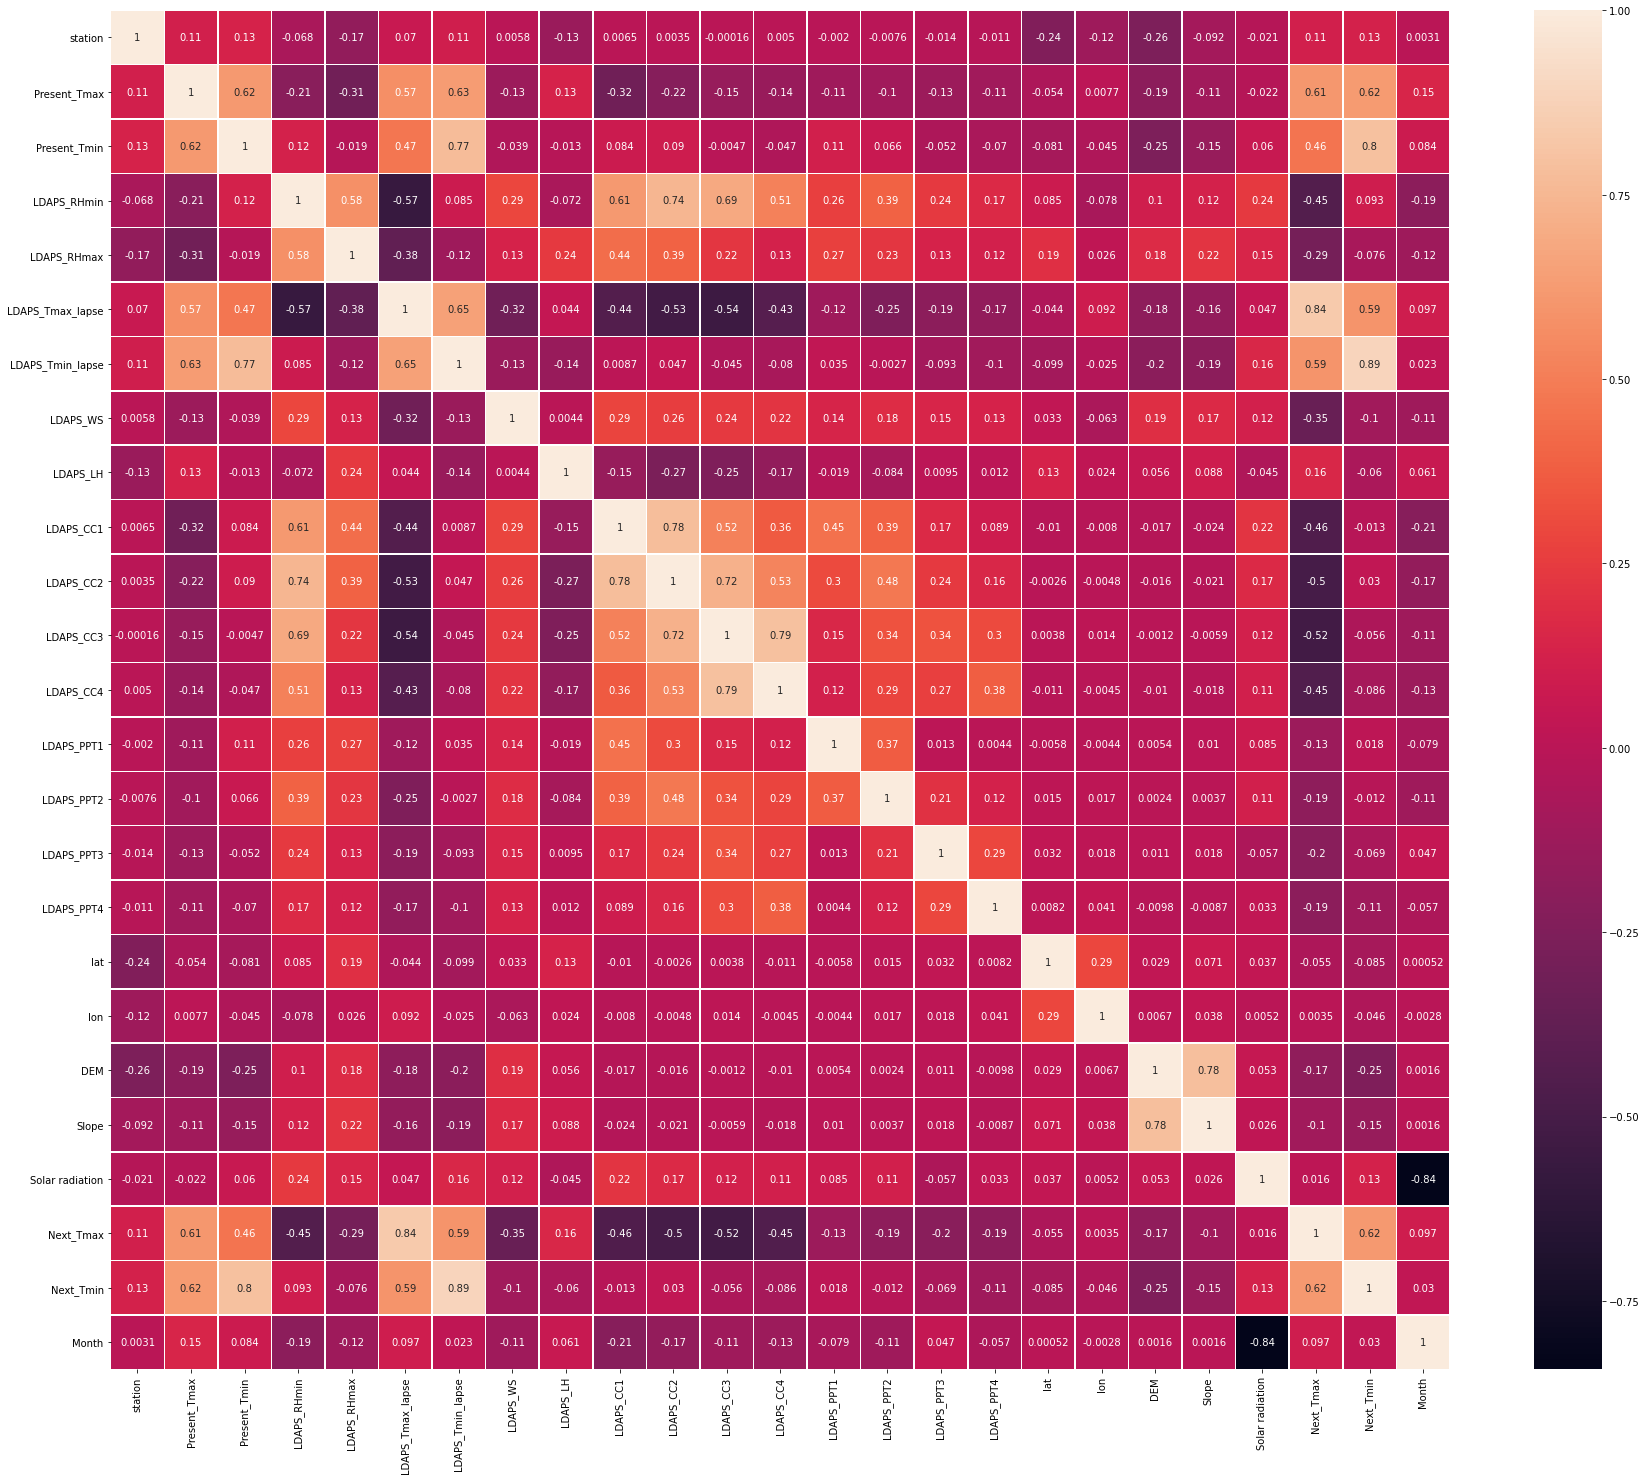

In [219]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# Checking Outliers

station                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Present_Tmax        AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Present_Tmin        AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
LDAPS_RHmin         AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
LDAPS_RHmax         AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
LDAPS_Tmax_lapse    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
LDAPS_WS            AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
LDAPS_LH               AxesSubplot(0.125,0.593621;0.0824468x0.130172)
LDAPS_CC1           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
LDAPS_CC2           AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
LDAPS_CC3           AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
LDAPS_CC4           AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
LDAPS_PPT1          AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
LDAPS_PPT2          

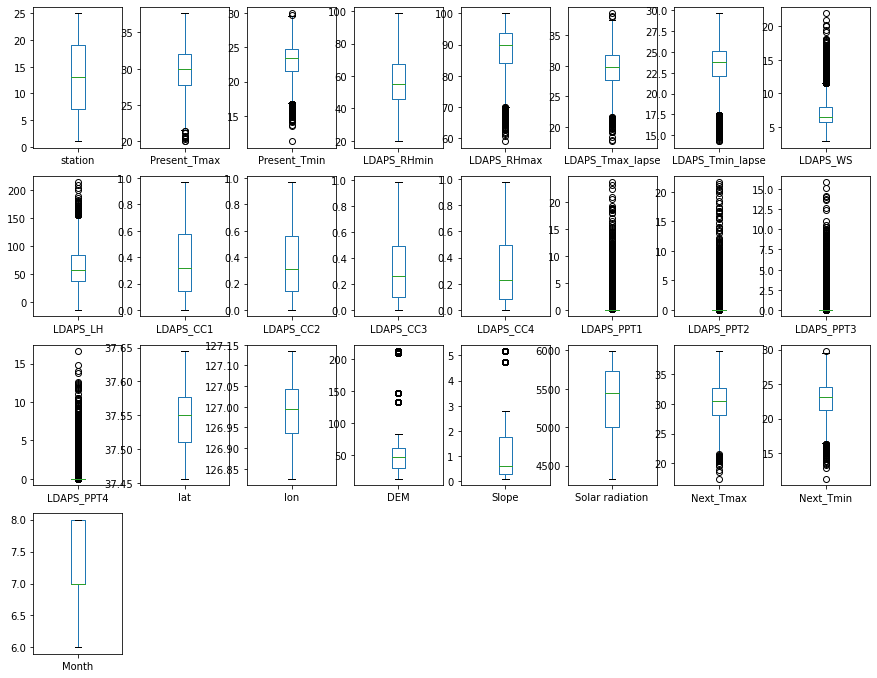

In [220]:
df.plot(kind='box',subplots=True,layout=(5,8),figsize=(15,15))

# we can that there are outliers present in almost all the columns

# removing outliers

In [221]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [222]:
df1=df[(z<3).all(axis=1)]
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8


In [223]:
df.shape

(7588, 25)

In [224]:
df1.shape

(6739, 25)

In [225]:
data_loss=(7588-6739)/7588*100
data_loss

11.188719030047443

# dataloss after removing outliers is more than 10% hence we cant remove outliers

# ANALYSIS FOR Next_Tmax

# removing skewness from the Data

In [226]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df[['Next_Tmax']]

In [227]:
x.shape

(7588, 23)

In [228]:
y.shape

(7588, 1)

In [229]:
x.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month'],
      dtype='object')

In [230]:
#removing skewness using power_transform method
from sklearn.preprocessing import power_transform
x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Month']]=power_transform(x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Month']],method='yeo-johnson')
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month
0,-1.857931,-0.400143,-0.785894,0.176401,0.271501,-0.556608,-0.311364,0.097802,0.318528,-0.407380,...,-0.560421,-0.521172,-0.4944,-0.447011,1.184635,-0.027876,1.833902,1.311979,1.852498,-2.459125
1,-1.647078,0.709652,-0.708063,-0.237180,0.184890,0.041543,0.143619,-0.619344,-0.201095,-0.446317,...,-0.560421,-0.521172,-0.4944,-0.447011,1.184635,0.498499,0.055065,-0.387168,1.398583,-2.459125
2,-1.454383,0.600750,-0.014024,-0.496590,-0.769141,0.124659,0.392812,-0.309297,-1.380242,-0.522163,...,-0.560421,-0.521172,-0.4944,-0.447011,0.653895,0.838708,-0.365481,-0.950272,1.378325,-2.459125
3,-1.274154,0.746176,0.028619,0.175337,1.309753,-0.008668,-0.173951,-0.650457,0.213209,-0.488978,...,-0.560421,-0.521172,-0.4944,-0.447011,1.974001,0.368982,0.083964,1.233016,1.355226,-2.459125
4,-1.103275,0.528707,-0.589813,0.035570,0.110434,-0.209847,-0.103645,-0.587672,1.292312,-0.808553,...,-0.560421,-0.521172,-0.4944,-0.447011,0.122569,1.876231,-0.291349,-0.403544,1.364282,-2.459125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.076068,-2.067275,-2.051124,-2.612830,-1.375942,-0.642292,-1.960554,-0.023579,-1.969347,-1.355217,...,-0.560421,-0.521172,-0.4944,-0.447011,0.122569,0.602644,-0.722455,-0.281473,-1.734456,1.019256
7746,1.193770,-2.225156,-2.175999,-2.060276,-0.803558,-0.998728,-2.094605,-0.563635,0.660500,-1.274975,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.683218,1.210750,-1.006916,-1.355268,-1.751541,1.019256
7747,1.310127,-2.013757,-2.267619,-2.395860,-1.319444,-1.109970,-1.824694,-0.302325,0.390795,-1.494541,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.145440,-1.261421,-1.579065,-1.281031,-1.749736,1.019256
7748,1.425208,-2.013757,-2.082634,-2.683428,-1.462026,-0.901582,-1.837066,-0.058794,-0.352678,-1.458474,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.414036,-1.044528,-1.401562,-1.073867,-1.755630,1.019256


# Feature Scaling

In [231]:
#scaling the data using Standard scaler
sc=StandardScaler()
x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month']]=sc.fit_transform(x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month']])

# check Vif

In [232]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"]=x.columns
vif

,vif,Features
0,1.296729,station
1,2.908339,Present_Tmax
2,3.157267,Present_Tmin
3,6.102622,LDAPS_RHmin
4,2.585504,LDAPS_RHmax
5,7.180260,LDAPS_Tmax_lapse
6,7.224941,LDAPS_Tmin_lapse
7,1.259247,LDAPS_WS
8,1.498337,LDAPS_LH
9,4.701793,LDAPS_CC1


# everything looks fine

# check PCA

In [233]:
for i in range(2,24):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.3845366565340851
3 0.4690291858672219
4 0.5488137833632719
5 0.6131064722107216
6 0.6714850416626786
7 0.72325849380777
8 0.7652262564957081
9 0.8021690896598734
10 0.8348858183254313
11 0.8625277981868136
12 0.8864024021386236
13 0.9082292855259128
14 0.9267084583503684
15 0.9417307302921689
16 0.9547684294277567
17 0.965407907055078
18 0.9745899274653398
19 0.9818948011048308
20 0.9877954943602628
21 0.9927549374822678
22 0.9973897012997893
23 0.9999999999999997


# choosing n_components as 17 with 96% data Retention

In [234]:
pca=PCA(n_components=17)
x=pca.fit_transform(x)

# now we move forward to model building

# MODEL BUILDING

In [235]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [236]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 82,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('cross_val mean score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
cross_val mean score 0.7852723271942043
r2 0.7854650393424625
diff 0.0001927121482582228


LinearRegression()
cross_val mean score 0.7544059397646758
r2 0.7666710577628603
diff 0.012265117998184416


Ridge()
cross_val mean score 0.754406292442838
r2 0.7666682974176172
diff 0.01226200497477925


BayesianRidge()
cross_val mean score 0.7544076102750124
r2 0.766628777206502
diff 0.012221166931489669


SGDRegressor()
cross_val mean score 0.75284477395645
r2 0.764449977078689
diff 0.011605203122239005


SVR()
cross_val mean score 0.8482441346655835
r2 0.866982581239259
diff 0.018738446573675516


AdaBoostRegressor()
cross_val mean score 0.6596782464792481
r2 0.6648048704890384
diff 0.005126624009790248


KNeighborsRegressor()
cross_val mean score 0.8303902761530859
r2 0.8396545667859608
diff 0.009264290632874927


RandomForestRegressor()
cross_val mean score 0.8340814257521802
r2 0.8473935551385411
diff 0.013312129386360838


BaggingRegressor()
cross_val mean scor

# After testing the models we saw that

# SVR is the best performing model with 86% r2 score

# random forest is the 2nd best after SVR with 84% r2 score

# we will hypertune these models

# SVR

In [237]:
svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [0.01,0.1,1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'C': 1, 'kernel': 'rbf'}




In [238]:
svr=SVR(kernel='rbf',C=1)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.866982581239259


In [239]:
svr=SVR(kernel='rbf',C=1)
svr.fit(x,y)
pred=svr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.8909333273610839


# Random Forest classifier

In [ ]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)

In [187]:
rfr=RandomForestRegressor(n_estimators=200,max_features='auto')
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.8476529349195343


In [188]:
rfr=RandomForestRegressor(n_estimators=200,max_features='auto')
rfr.fit(x,y)
pred=rfr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.980324464408203


# we saw that while predicting Next_Tmax our best performing model is Random forest Regressor and will save the model

In [189]:
joblib.dump(rfr,'temp_max.obj')

['temp_max.obj']

# ANALYSIS OF Next_Tmin

# will do all the same process as we did for analysis of Next_Tmax just the traget variable is Next_Tmin

In [240]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df['Next_Tmin']

In [241]:
x.shape

(7588, 23)

In [242]:
y.shape

(7588,)

In [243]:
#removing skewness using power_transform method
from sklearn.preprocessing import power_transform
x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Month']]=power_transform(x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Month']],method='yeo-johnson')
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month
0,-1.857931,-0.400143,-0.785894,0.176401,0.271501,-0.556608,-0.311364,0.097802,0.318528,-0.407380,...,-0.560421,-0.521172,-0.4944,-0.447011,1.184635,-0.027876,1.833902,1.311979,1.852498,-2.459125
1,-1.647078,0.709652,-0.708063,-0.237180,0.184890,0.041543,0.143619,-0.619344,-0.201095,-0.446317,...,-0.560421,-0.521172,-0.4944,-0.447011,1.184635,0.498499,0.055065,-0.387168,1.398583,-2.459125
2,-1.454383,0.600750,-0.014024,-0.496590,-0.769141,0.124659,0.392812,-0.309297,-1.380242,-0.522163,...,-0.560421,-0.521172,-0.4944,-0.447011,0.653895,0.838708,-0.365481,-0.950272,1.378325,-2.459125
3,-1.274154,0.746176,0.028619,0.175337,1.309753,-0.008668,-0.173951,-0.650457,0.213209,-0.488978,...,-0.560421,-0.521172,-0.4944,-0.447011,1.974001,0.368982,0.083964,1.233016,1.355226,-2.459125
4,-1.103275,0.528707,-0.589813,0.035570,0.110434,-0.209847,-0.103645,-0.587672,1.292312,-0.808553,...,-0.560421,-0.521172,-0.4944,-0.447011,0.122569,1.876231,-0.291349,-0.403544,1.364282,-2.459125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.076068,-2.067275,-2.051124,-2.612830,-1.375942,-0.642292,-1.960554,-0.023579,-1.969347,-1.355217,...,-0.560421,-0.521172,-0.4944,-0.447011,0.122569,0.602644,-0.722455,-0.281473,-1.734456,1.019256
7746,1.193770,-2.225156,-2.175999,-2.060276,-0.803558,-0.998728,-2.094605,-0.563635,0.660500,-1.274975,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.683218,1.210750,-1.006916,-1.355268,-1.751541,1.019256
7747,1.310127,-2.013757,-2.267619,-2.395860,-1.319444,-1.109970,-1.824694,-0.302325,0.390795,-1.494541,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.145440,-1.261421,-1.579065,-1.281031,-1.749736,1.019256
7748,1.425208,-2.013757,-2.082634,-2.683428,-1.462026,-0.901582,-1.837066,-0.058794,-0.352678,-1.458474,...,-0.560421,-0.521172,-0.4944,-0.447011,-0.414036,-1.044528,-1.401562,-1.073867,-1.755630,1.019256


# Feature Scaling

In [244]:
#scaling the data using Standard scaler
sc=StandardScaler()
x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month']]=sc.fit_transform(x[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Month']])

# PCA

In [245]:
for i in range(2,24):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.3845366565341949
3 0.4690291859408381
4 0.5488138184381889
5 0.6131064474593053
6 0.6714850130443984
7 0.7232585038063866
8 0.765226277524638
9 0.8021688249795442
10 0.8348858161794346
11 0.8625278072309646
12 0.886402402043864
13 0.9082292855259129
14 0.9267084583503691
15 0.9417307302921694
16 0.9547684294277567
17 0.9654079070550801
18 0.9745899274653379
19 0.9818948011048308
20 0.9877954943602628
21 0.9927549374822678
22 0.9973897012997893
23 0.9999999999999997


In [246]:
pca=PCA(n_components=17)
x=pca.fit_transform(x)

# Model building

In [247]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [248]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 82,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('cross_val mean score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
cross_val mean score 0.836842623296571
r2 0.8286547477034669
diff 0.008187875593104077


LinearRegression()
cross_val mean score 0.8261947865889308
r2 0.8140869790982128
diff 0.012107807490717937


Ridge()
cross_val mean score 0.8261952722190846
r2 0.8140849643924639
diff 0.012110307826620703


BayesianRidge()
cross_val mean score 0.8261980280345373
r2 0.8140701491493054
diff 0.012127878885231924


SGDRegressor()
cross_val mean score 0.8257419668221273
r2 0.8132763054814949
diff 0.012465661340632428


SVR()
cross_val mean score 0.8843565656617889
r2 0.8844764319917217
diff 0.0001198663299327718


AdaBoostRegressor()
cross_val mean score 0.753339977405995
r2 0.7348499484720662
diff 0.018490028933928815


KNeighborsRegressor()
cross_val mean score 0.8486817663965279
r2 0.8441920053640932
diff 0.004489761032434703


RandomForestRegressor()
cross_val mean score 0.8618730131495995
r2 0.8531939132486611
diff 0.008679099900938403


BaggingRegressor()
cross_val mean

# After testing the models we saw that
# SVR is the best performing model with 88% r2 score
# random forest is the 2nd best after SVR with 85% r2 score
# we will hypertune these models

# SVR

In [249]:
svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [0.01,0.1,1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [250]:
svr=SVR(kernel='rbf',C=1)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.8844764319917217


In [251]:
svr=SVR(kernel='rbf',C=1)
svr.fit(x,y)
pred=svr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.9131760289350073


# Random Forest Regressor

In [ ]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)

In [252]:
rfr=RandomForestRegressor(n_estimators=200,max_features='auto')
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.8537325324598319


In [253]:
rfr=RandomForestRegressor(n_estimators=200,max_features='auto')
rfr.fit(x,y)
pred=rfr.predict(x_test)
print('r2_score :',r2_score(y_test,pred))

r2_score : 0.9820429553265376


# we saw that while predicting Next_Tmin our best performing model is Random forest Regressor and will save the model

In [255]:
joblib.dump(rfr,'Temp_min.obj')

['Temp_min.obj']